In [1]:
import pandas as pd
import seaborn as sn
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import joblib
import keras.activations,keras.losses,keras.optimizers
print('imported')


imported


In [2]:
data=pd.read_csv("dataset/DATASET-balanced.csv")
print(data.columns)
print(data.describe())

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')
        chroma_stft           rms  spectral_centroid  spectral_bandwidth  \
count  11778.000000  11778.000000       11778.000000        11778.000000   
mean       0.421925      0.037894        2719.201373         3050.299988   
std        0.069392      0.028071        1066.754739          872.258653   
min        0.200353      0.000043         756.163229         1096.903152   
25%        0.372330      0.015098        2062.875836         2569.289971   
50%        0.417708      0.031870        2579.963841         3055.863462   
75%        0.467741      0.054046        3283.857559         3581.271953   
max        0.707202      0.168958   

In [3]:

data = pd.read_csv("dataset/DATASET-balanced.csv")
noise={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    out=np.abs(data['z-scores'] > 3)
    if out.sum() >0:
        noise[i]=out.sum()
thresh=2.5
for i in noise:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data=data[(data[i]>lower)&(data[i]<upper)]
print("im")

im


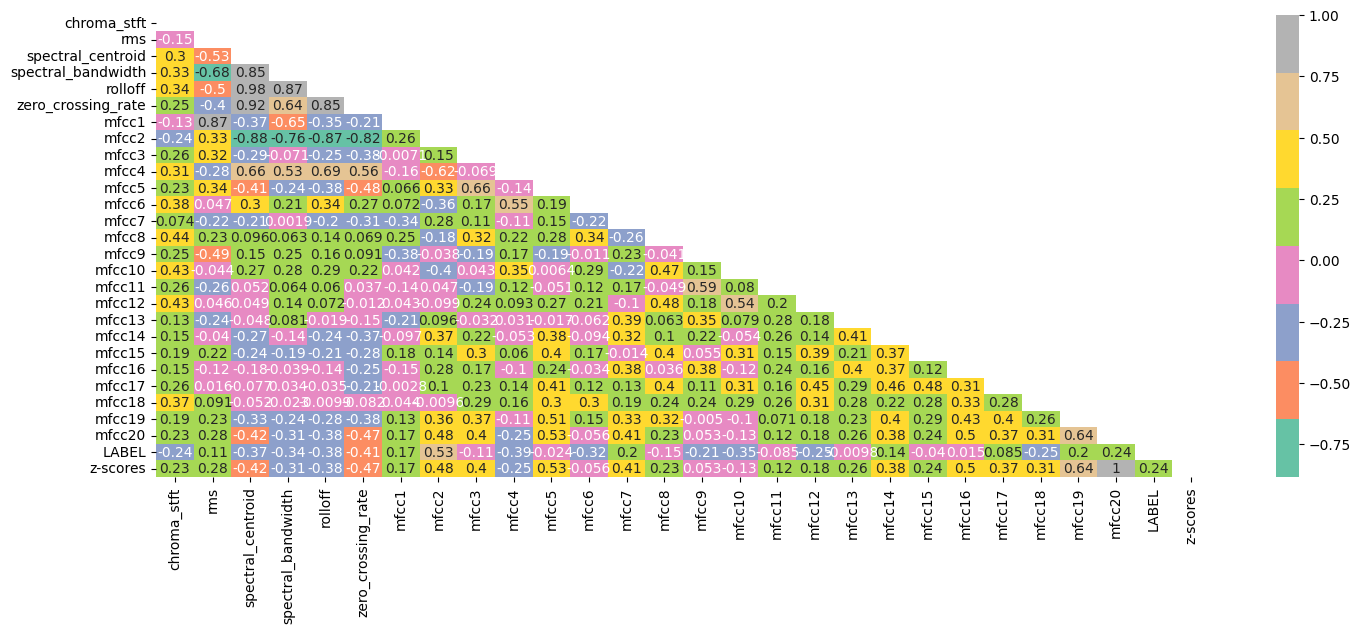

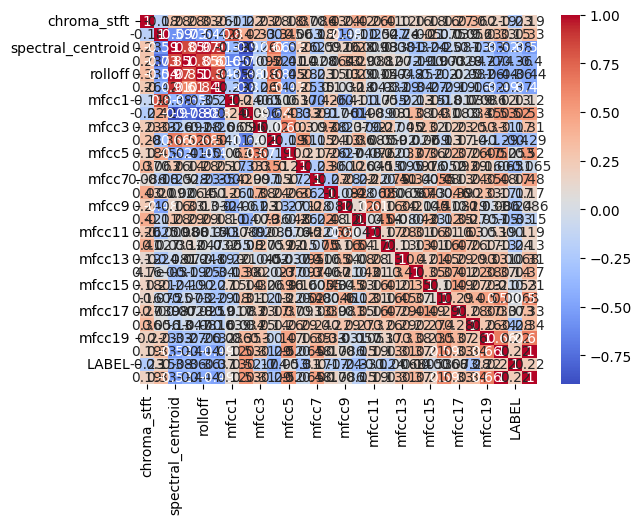

In [4]:
lab=LabelEncoder()
for i in data.select_dtypes(include="object").columns.values:
    data[i]=lab.fit_transform(data[i])
x=[]
corr=data.corr()['LABEL']
corr=corr.drop(['LABEL','z-scores'])
for i in corr.index:
    if corr[i] >0:
        x.append(i)
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
columns_to_keep = ['chroma_stft','rms','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20'
]
x = data[columns_to_keep]
y = data['LABEL']
x_train,x_test,y_train,y_test=train_test_split(x,y)

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print('The MLP classifiers ',mlp_classifier.score(x_test,y_test))

The MLP classifiers  0.774712643678161


In [6]:

# Function to extract audio features
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Initialize an empty list to store features
    features = []

    # Chroma short-time Fourier transform
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features.append(chroma_stft)

    # Root Mean Square (RMS)
    rms = np.mean(librosa.feature.rms(y=y))
    features.append(rms)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features.append(spectral_centroid)

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features.append(spectral_bandwidth)

    # Spectral Rolloff
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features.append(rolloff)

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    features.append(zero_crossing_rate)
    
    # Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20), axis=1)
    features.extend(mfccs)
    # Convert the features list to a numpy array
    features_array = features

    return features_array


In [7]:
file_path = 'dataset/biden-to-musk.wav'
features = [extract_features(file_path)]
print(features)

print(mlp_classifier.predict(features))
if mlp_classifier.predict(features) == 1 :
    print("real audio")
else:
    print("fake audio")

[[0.37420687, 0.06401439, 1884.7799859617733, 1872.6203845150462, 3482.4718586357753, 0.09962643838888352, -265.9371, 114.91201, -35.31989, 10.318928, 4.3399854, -12.872276, -4.8856506, -7.9398165, -12.818471, 1.39729, -5.1707377, -1.125127, -1.3156409, -0.84751755, -5.077101, -0.48379624, -4.686765, -4.363131, -2.1579561, 0.08753038]]
[1]
real audio


D:\deepfakepj\deepfake\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\deepfakepj\deepfake\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [8]:
y_pre=mlp_classifier.predict(x_test)

In [9]:
joblib.dump(mlp_classifier, './../savedmodels/mlp_classifier_model.joblib')

['./../savedmodels/mlp_classifier_model.joblib']

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.774712643678161

In [11]:
#dump(mlp_classifier,'./../savedmodels/model.joblib')

In [12]:
#from joblib import dump 